# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Joseph Putra Chrisyanto
- **Email:** C14220330@john.petra.ac.id
- **ID Dicoding:** JOSEPH PUTRA C

## Menentukan Pertanyaan Bisnis

- Seberapa besar perbedaan presentase antara penyewaan akhir pekan dan hari kerja?

- Bagaimana perubahan persewaan tiap musim gugur selama dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Import data dari file "day.csv" dan menunjukan 5 row awal
- Data yang diimport mempunyai 16 kolom

### Assessing Data

In [3]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
day_df.duplicated().sum()

np.int64(0)

**Insight:**
- Data yang diberikan sudah tidak ada null dan duplikat

### Cleaning Data

In [5]:
##

**Insight:**
- Data yang diberikan sudah bersih jadi tidak diperlukan cleaning data


## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [7]:
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

In [8]:
day_df.groupby(by="weekday").agg({
    "registered": "mean",
    "is_weekend": "first"
})

,registered,is_weekend
weekday,,
0,2890.533333,1
1,3663.990476,0
2,3954.480769,0
3,3997.394231,0
4,4076.298077,0
5,3938.000000,0
6,3085.285714,1


**Insight:**
- Menjelajahi pertanyaan 1 "Seberapa besar perbedaan presentase antara penyewaan akhir pekan dan hari kerja?"
- Membuat kolom baru is_weekend, kemudian didapat tabel rata rata penyewa tiapharinya dengan tag is_weekend

In [9]:
day_df[day_df['season'] == 2].groupby(by="yr").agg({
    "season" : "mean",
    "registered": "mean"
})

,season,registered
yr,,
0,2.0,2932.086957
1,2.0,4840.380435


**Insight:**
- Menjelajahi petanyaan 2 "Bagaimana perubahan persewaan tiap musim gugur selama dua tahun terakhir?"
- Mendapatkan visualisasi tabel untuk mengetahui jumlah antara 2 musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

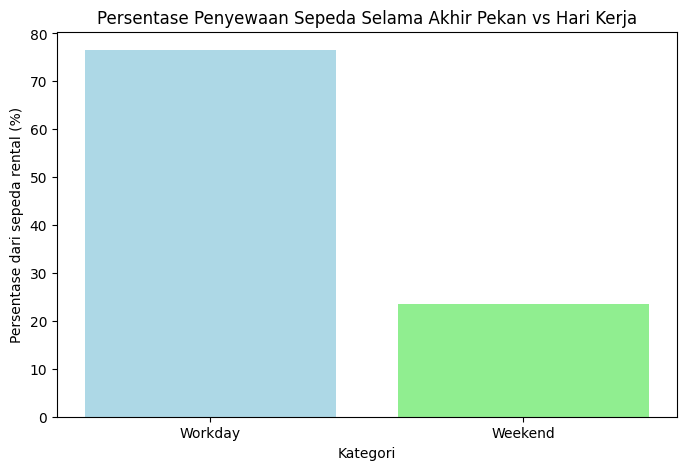

In [10]:
grouped_df = day_df.groupby('is_weekend').agg({
    'registered': 'sum'
}).reset_index()

total_rentals = grouped_df['registered'].sum()

grouped_df['percentage'] = (grouped_df['registered'] / total_rentals) * 100

grouped_df['is_weekend'] = grouped_df['is_weekend'].apply(lambda x: 'Weekend' if x == 1 else 'Workday')

plt.figure(figsize=(8, 5))
plt.bar(grouped_df['is_weekend'], grouped_df['percentage'], color=['lightblue', 'lightgreen'])

plt.xlabel('Kategori')
plt.ylabel('Persentase dari sepeda rental (%)')
plt.title('Persentase Penyewaan Sepeda Selama Akhir Pekan vs Hari Kerja')

plt.show()

In [11]:
grouped_df.head()

,is_weekend,registered,percentage
0,Workday,2045201,76.522995
1,Weekend,627461,23.477005


**Insight:**
- Menggunakan is_weekend yang dibuat saat EDA, kemudian membuat tabel baru untuk menyimpan presentase.
- Untuk tabel baru membuat kolom baru untuk persentase, dengan membagi registered pada setiap kategori dan total registered dan merubahnya menjadi presentase.

### Pertanyaan 2:

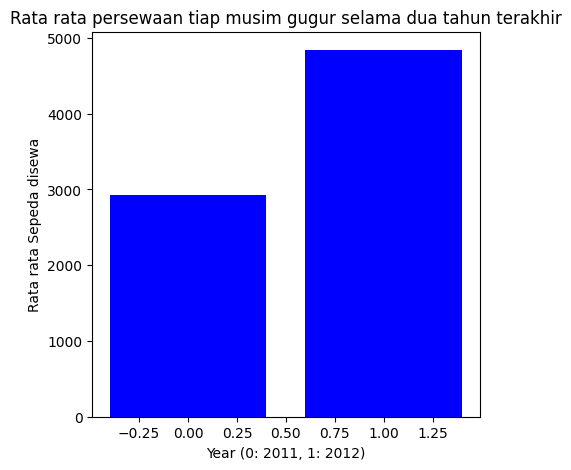

In [12]:
seasonYr_df = day_df[day_df['season'] == 2].groupby(by="yr").agg({
    "season" : "nunique",
    "registered": "mean"
})

plt.figure(figsize=(5, 5))
plt.bar(seasonYr_df.index, seasonYr_df['registered'], color='blue')

plt.xlabel('Year (0: 2011, 1: 2012)')
plt.ylabel('Rata rata Sepeda disewa')
plt.title('Rata rata persewaan tiap musim gugur selama dua tahun terakhir')

plt.show()

**Insight:**
- Mendapat tabel bar yang membandingkan antara 2 musim tersebut

## Analisis Lanjutan (Opsional)

## Conclusion

- Terdapat perbedaan persentase yang lumayan besar dalam penyewaan sepeda pada akhir pekan dan hari kerja. Pada akhir pekan terjadi penurunan penyewaan.
- Ada perubahan persewaan sepeda yang signifikan dari musim gugur 2011 dan 2012. Jadi ada trend naik yang positif dalam dua tahun terakhir.